# Import & Export of Network Formats to be used by GA

GA requires as initial input weighted, undirected NetworkX graph objects. If you have an unweighted graph all edges should be assigned the same weight. By default the edge weight attribute is assumed to be "weight", but this can be set when needed.

Below functions are shown that can format common graph file formats into the format used by GA and also shows how to assign edge weights to an unweighted graph.

Additional it shows how the graph object can be converted back to a convertable format, which can be used to transfer it to other tools or languages (e.g. R)

In [2]:
import networkx as nx

## Import

### Read graph form an unweighted edge list with column headings

The file should contain a head column, in the example this is V1 & V2 - replace this values in the code snipped with your values. Each following row should contain an edge (node1 node2). The node IDs used in the file will be assigned to the nodes in the created graph object. The example file uses tab (\t) to separate nodes, this can be any other value though - for other values replace \t in the code snipped with the separator your file is using.

The same function is used in the example usage files, where it also shows how to append the created objects to a list, which can then be used for the whole analysis pipeline

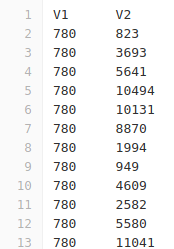

In [ ]:
#REPLACE this with the acutal file location
path ="location to your edgelist file"
    
#read the edgelist file as a dataframe
#ADUST the separator if needed
fh = pd.read_csv(path, sep="\t")

#convert it into a NetworkX graph G and specify the column names of the node pairs
#REPALCE the column names if needed
G=nx.from_pandas_edgelist(fh, "V1", "V2")

#if you have an unweighted network assign all edges the same edge weight - here a value of 1 is assigned
#REPLACE weight with any name you would like your edge weights to be called
for u, v, d in G.edges(data=True):
    d['weight'] = 1


### Read graph form a weighted edge list with column headings

This follows the same format as the previous, with the exception that an additional column needs to be added to the file containing the edge weights (here called W). This column name needs to be set in the last step as edge_attribute parameter

In [ ]:
#REPLACE this with the acutal file location
path ="location to your edgelist file"
    
#read the edgelist file as a dataframe
#ADUST the separator if needed
fh = pd.read_csv(path, sep="\t")

#convert it into a NetworkX graph G and specify the column names of the node pairs
#REPALCE the column names if needed
G=nx.from_pandas_edgelist(fh, "V1", "V2", edge_attribute="W")

### Read graph form an unweighted edge list without column headings

The file needs to be in the same format as previous with the exception of no header row provided and no weight column.

In [ ]:
#REPLACE this with the acutal file location
path ="location to your edgelist file"
    
#REPLACE delimiter with the delimiter used in your file
G = nx.read_edgelist(path, delimiter="\t")

### Read graph form an weighted edge list without column headings

The file needs to be in the same format as previous with the exception of no header row provided but an additional third (numerical) weight column needs to be provided

In [ ]:
#REPLACE this with the acutal file location
path ="location to your edgelist file"
    
#REPLACE delimiter with the delimiter used in your file
G = nx.read_weighted_edgelist(path, delimiter="\t")

### Read graph from adjacency matrix without row and column names


The values in the matrix will be set as edge weights under the edge attribute name weight. If other weights want to be used you can use 
for u, v, d in G.edges(data=True):
    d['weight'] = 1
    
from the previous examples, to set all weights to 1/ add a weight attribute (with another name).

Since no column / row names are provided the nodes will be named numerically after their appearance. If specific node names want to be set you can use the relabel_nodes functions as shown in the Read graph from adjacency matrix with row and column names example

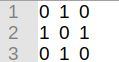

In [ ]:
#REPLACE this with the acutal file location
path ="location to your edgelist file"



frame = pd.read_csv(path, sep="\t", header=None)

    
#convert to adj matrix
mat = frame.to_numpy()
#load as graph
G = nx.from_numpy_matrix(mat)




### Read graph from adjacency matrix with row and column names

The values in the matrix will be set as edge weights under the edge attribute name weight. If other weights want to be used you can use 
for u, v, d in G.edges(data=True):
    d['weight'] = 1
    
from the previous examples, to set all weights to 1/ add a weight attribute

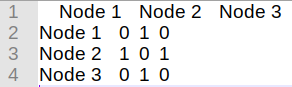

In [ ]:
#REPLACE this with the acutal file location
path ="location to your edgelist file"



frame = pd.read_csv(path, sep="\t", index_col=0)
#get node names from column (or index) names
node_names = list(frame.columns)

#convert into a dict to replace the later in the read graph object
nodemapping = {}
for i in range(len(nodes)):
    nodemapping[i] = node_names[i]
    
#convert to adj matrix
mat = frame.to_numpy()
#load as graph
G = nx.from_numpy_matrix(mat)
#relabel nodes
G = nx.relabel_nodes(G, nodemapping, copy=False)



## Export

Write graph to file

### Write edgelist (weighted or unweighted) with column headings from a NetworkX graph object

Set the source and target parameters as column names to be used for the edgelist. The weight column will be named after the edge attribute name if applicable. You can write the edge list to a csv file with the to_csv() function. Specify the separator to be used in the sep paramter.

In [14]:
# G is a networkx graph object

df = nx.to_pandas_edgelist(G, source="V1", target="V2")

#write as csv file
path ="file location + file name.csv"
df.to_csv(path, sep="\t")

### Write adjacency matrix with column and row names

Save graph as adjacency matrix. Replace "weight" with the edge attribute to be used, if the attribute does not exist a value of 1 is set for an existing edge. The nodes in the resulting adjacency matrix are ordered in the same way as in nodenames. 

In [ ]:
# G is a networkx graph object

nodenames = list(G.nodes())
df = nx.to_pandas_adjacency(G, weight="weight", nodelist=nodenames)



#write as csv file
path ="file location + file name.csv"
df.to_csv(path, sep="\t")

### Write adjacency matrix without column and row names


In [ ]:
# G is a networkx graph object

nodenames = list(G.nodes())
df = nx.to_pandas_adjacency(G, weight="weight", nodelist=nodenames)



#write as csv file
path ="file location + file name.csv"
df.to_csv(path, sep="\t", header=False, index=False)

### Pickle as Python Object

Every Python object can pickled which allows it to be read back into a Python object

In [19]:
import pickle

#to write as a pickle
path ="file location + file name.pckl"
with open(location + path, "wb") as f:
        pickle.dump(G, f, protocol=4)

In [ ]:
#to read as a pickle

import pickle

path ="file location + file name.pckl"
with open(path, "rb") as f:
      G = pickle.load(f)

### Write as graphml

In [ ]:
path ="file location + file name.graphml"

nx.write_graphml_lxml(G, path)  

